In [12]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import math

# Spot the difference

Please clone the repo with all the images so that you get a smoother experience \
git repo: https://github.com/danamestrial/spot-the-difference

So in this num(meth)math project I shall be doing a basic
spotting the difference program \
\
Theres two method of doing this, one method is the easy way of importing a library and everything could be done in 4 lines of code and of course the hard way which is doing it using matplotlib, and we will doing both method, because where is the fun in just importing a library that could do that in two lines

## Image Spliter
\
If the image to compare is one picture we have to split the image using a image-slicer library \
We have to install the image_slicer library using \
``pip install image_slicer``

In [6]:
# Import the good stuff

import os
from image_slicer import slice

In [41]:
# Path of the image

folder = "Split" #<--- if no folder leave empty

fileName = "image3.jpg"

path = folder + "/" + fileName

size = cv2.imread(path).shape

# if Image height is longer than the width, it rotates the image and slices then rotates it back automatically

if size[0] > size[1]:
    image_norm = cv2.rotate(cv2.imread(path), cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(folder + "/" + "rotated.png", image_norm)
    slice(folder + "/" + "rotated.png", 2)
    os.remove(folder + "/" + "rotated.png")
    
    image_norm = cv2.rotate(cv2.imread(folder + "/" + "rotated_01_01.png"), cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2.imwrite(folder + "/" + "rotated_01_01.png", image_norm)
    image_norm2 = cv2.rotate(cv2.imread(folder + "/" + "rotated_01_02.png"), cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2.imwrite(folder + "/" + "rotated_01_02.png", image_norm2)
    
    oldFile = os.path.join(folder, "rotated_01_01.png")
    oldFile2 = os.path.join(folder, "rotated_01_02.png")
    newFile = os.path.join(folder, os.path.splitext(fileName)[0]+"_01_01.png")
    newFile2 = os.path.join(folder, os.path.splitext(fileName)[0]+"_01_02.png")
    
    os.rename(oldFile, newFile)
    os.rename(oldFile2, newFile2)
else:
    newFile = os.path.join(folder, os.path.splitext(fileName)[0]+"_01_01.png")
    newFile2 = os.path.join(folder, os.path.splitext(fileName)[0]+"_01_02.png")
    slice(path, 2)

# Slice the image into 2



### Now we have two images

<table><tr>
<td> <img src="Split/image_01_01.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="Split/image_01_02.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

## Image Aligner
\
So the problem with the image spliter is that if the stacked image is not splited equally due to having spaces between the two pictures, to fix this problem we will use crop the image so its **as aligned as possible**

Please install the opencv library using, before proceeding\
``pip install opencv-python`` and\
``pip install pillow``

### Implementation

In [42]:
# Import the good stuff

import cv2
from PIL import Image, ImageChops

In [63]:
image = Image.open(newFile)
image2 = Image.open(newFile2)

def trimmer(x, y):
    width, height = image.size
    im1 = image.crop((0,y,(width-x),height))
    im2 = image2.crop((x,0,width,(height-y)))
    im1.save("cache/trim.png")
    im2.save("cache/trim2.png")
    return None

# trimmer(0,2)

In [61]:
trimmer(0, 0)
agl = cv2.imread("cache/trim.png")
agl2 = cv2.imread("cache/trim2.png")

# Cost is the difference between two images

def cost(img1, img2):
    # Take the absolute difference of the images
    res = cv2.absdiff(img1, img2)

    # Convert the result to integer type
    res = res.astype(np.uint8)
    
    # Convert to percentage
    percentage = (np.count_nonzero(res) * 100)/ res.size
    
    return percentage
    
def iterateBestX():
    best = 0
    curCost = cost(agl,agl2)
    
    while(True):
        trimmer(best+1, 0)
        newagl = cv2.imread("cache/trim.png")
        newagl2 = cv2.imread("cache/trim2.png")
        newCost = cost(newagl, newagl2)
        if(newCost < curCost):
            curCost = newCost
            best+=1
        else:
            break
    return best

def iterateBestY():
    best = 0
    curCost = cost(agl,agl2)
    
    while(True):
        trimmer(0, best+1)
        newagl = cv2.imread("cache/trim.png")
        newagl2 = cv2.imread("cache/trim2.png")
        newCost = cost(newagl, newagl2)
        if(newCost < curCost):
            curCost = newCost
            best+=1
        else:
            break
    return best

bestTrimX = iterateBestX() #This two step is a bit slow

agl = cv2.imread("cache/trim.png")
agl2 = cv2.imread("cache/trim2.png")

bestTrimY = iterateBestY()

print("Best trim on the X axis is: " + str(bestTrimX) + "\nBest trim on the Y axis is: " + str(bestTrimY) + "\nImage alignment optimisation completed")
trimmer(bestTrimX, bestTrimY)

Best trim on the X axis is: 0
Best trim on the Y axis is: 2
Image alignment optimisation completed


### Path to the two file

In [46]:
img1path = "cache/trim.png"
img2path = "cache/trim2.png"

## Method 1 - the easy way
(props to geeksforgeeks)\
We will be using a library called "Pillow"

1. Dont forget to install pillow using
``pip install pillow``

### Implementation

In [2]:
# Import the good stuff

from PIL import Image, ImageChops

In [72]:
# The case that you have two seperate images to compare

img1 = Image.open("Spot1/1img.jpeg")
img2 = Image.open("Spot1/2img.jpeg")

In [73]:
# finding difference

diff = ImageChops.difference(img1, img2)
  
# showing the difference

diff.save("Results/method_1_result.jpeg")

#### Result

<table><tr>
<td> <img src="Spot1/1img.jpeg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="Results/method_1_result.jpeg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="Spot1/2img.jpeg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

I know the output is a bit hard to see but you can match it with the original image to see the difference

## Method 2 - The matplotlib way
Mario but find the difference \
why am I still here? just to suffer

In [36]:
# Again importing the good stuff

import cv2

### Implementation

We are looping over all the pixel of both images and we have the ``isSame`` function to check whether the pixel between the two image is within a specific range (so that it is similar) then ``edge`` function to create the picture to show the difference.

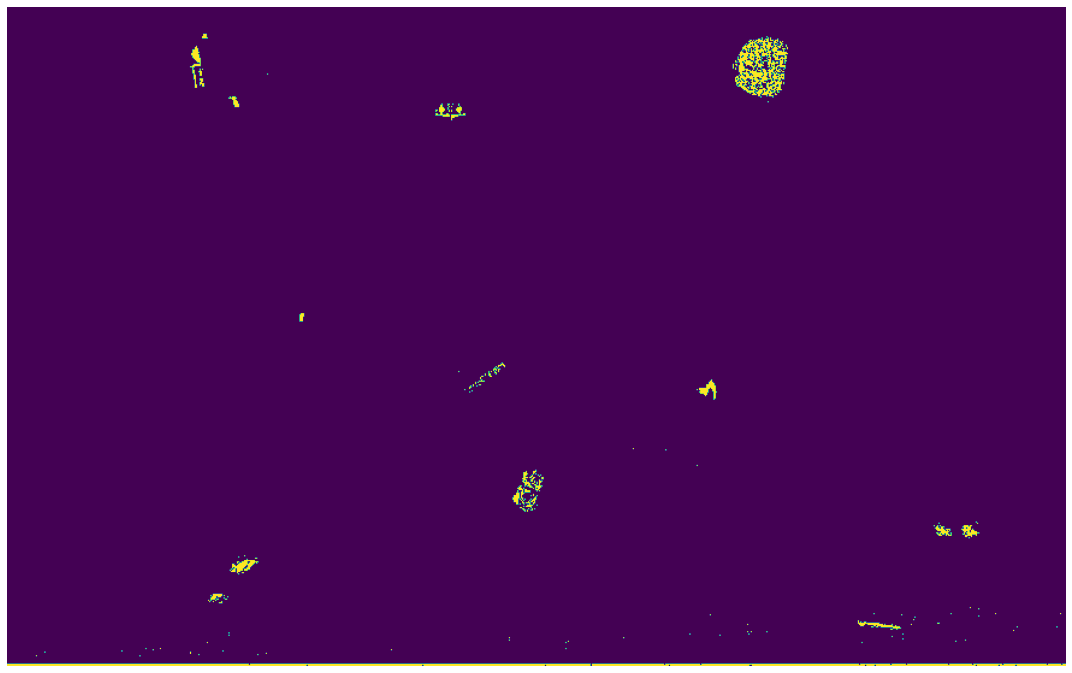

In [67]:
img1 = plt.imread(img1path)
img2 = plt.imread(img2path)

# isSame function returns boolean if the pixel is the same

def isSame(x, y):
    diff = img1[y,x]-img2[y,x]
    return all(abs(diff) < 0.2) # <---  Adjust this for sensitivity

# edge function to create the edge

def edge(img):
    ny, nx, _ = img.shape
    ret = np.zeros((ny, nx))
    for y in range(ny):
        for x in range(nx):
#             ret[y,x] = 1
            ret[y, x] = 0 if isSame(x,y) else 1
    return ret


plt.figure(figsize = (15,10))
edges = edge(img1)
plt.imshow(edges)
plt.axis('off')
plt.tight_layout()
plt.savefig('cache/color_diff.png', bbox_inches='tight', pad_inches=0)

### Highlighting the contour and overlaying it into the original image
This part is total pain

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


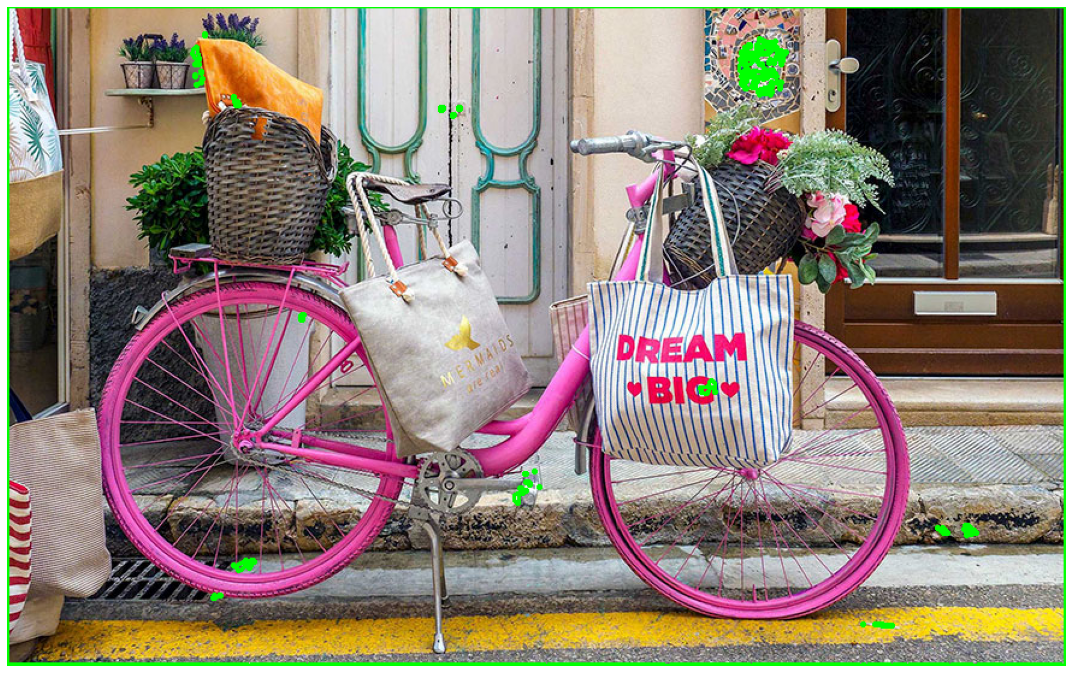

In [70]:
image = cv2.imread("cache/color_diff.png")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

size = img1.shape

binary = cv2.resize(binary, (size[1], size[0]))

# plt.imshow(binary, cmap="gray")
# plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image2 = cv2.drawContours(img2, contours, -1, (0, 255, 0), 2)
# print(image.shape)

# show the image with the drawn contours
plt.figure(figsize = (15,10))
plt.imshow(image2)
plt.axis('off')
plt.tight_layout()

#Saving the file
plt.savefig('Results/result_diff.png', bbox_inches='tight', pad_inches=0)
plt.show()

### Final Product

<table><tr>
    <td> <img src="Spot1/1img.jpeg" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="Spot1/2img.jpeg" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="Results/sushi_result_diff.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

<table><tr>
    <td> <img src="Split/image_01_01.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="Split/image_01_02.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="Results/donut_result_diff.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

<table><tr>
    <td> <img src="Split/image3_01_01.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="Split/image3_01_02.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="Results/bicycle_result_diff.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

## Problems with the program

### Image spliter

So the problem with the image spliter is that if the stacked image is not splited equally due to having spaces between the two pictures the image detector becomes buggy and causes anomalys as shown in the car spot the difference images

### The detection implementation

If two images are not exactly aligned due to the image spliter it causes the anomaly as stated above, Ive tried for too long to automatically shift the image so it aligns but failed.

I think to fix this problem the use has to automatically adjust the threshold of pixel detection above but I find that the sweet spot lies between 0.2 and 0.1.

When the image is aligned correctly (shown by the sushi image) the p

## Solution to the problems

### Automatic aligner

Through blood sweat and tears, I've created an image aligner to minimise anomaly created through the image splitting process

# GUI

``sudo apt-get install python3-tk``

In [20]:
import tkinter as tk

window = tk.Tk()
label = tk.Label(text="Python rocks!")
label.pack()

window.mainloop()

In [177]:
from tkinter import *

root = Tk()
center_window(root.winfo_screenwidth()/2, root.winfo_screenheight()/2)
root.update()

def center_window(width, height):
    # get screen width and height
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()

    # calculate position x and y coordinates
    x = (screen_width/2) - (width/2)
    y = (screen_height/2) - (height/2)
    root.geometry('%dx%d+%d+%d' % (width, height, x, y))

def select_file_1():
    filetypes = (
        ('All files', '*.*'),
#         ('text files', '*.txt')
    )

    filename = fd.askopenfilename(
        title='Open a file',
        initialdir='',
        filetypes=filetypes)

    Label(root, text = filename,wraplength=250).place(
        x = root.winfo_width()/3-150,y = root.winfo_height()/2+100)
    
def select_file_2():
    filetypes = (
        ('All files', '*.*'),
#         ('text files', '*.txt')
    )

    filename = fd.askopenfilename(
        title='Open a file',
        initialdir='',
        filetypes=filetypes)

    Label(root, text = filename,wraplength=250).place(
        x = root.winfo_width()/2+50,y = root.winfo_height()/2+100)
    
    
# select button first picture
select_button1 = Button(root, text='Select #1 Picture', command=select_file_1, 
                        height = int(root.winfo_width()/200), width = int(root.winfo_height()/20))
select_button1.place(x= int(root.winfo_width()/3-150), y= int(root.winfo_height()/2))


# select button second picture
select_button2 = Button(root, text='Select #2 Picture', command=select_file_2,
                        height = int(root.winfo_width()/200), width = int(root.winfo_height()/20))
select_button2.place(x= int(root.winfo_width()/2+50), y= int(root.winfo_height()/2))


# # image slicer button
# select_button2 = Button(root, text='Select #2 Picture', command=select_file_2,
#                         height = int(root.winfo_width()/200), width = int(root.winfo_height()/20))
# select_button2.place(x= int(root.winfo_width()/2+50), y= int(root.winfo_height()/5))

# print(root.winfo_width(), root.winfo_height())

root.mainloop()